In [1]:
import sys
import scipy.io.wavfile
import math
import numpy as np
import matplotlib.pyplot as plt

import math
from scipy import signal
from scipy import fftpack

In [68]:
class GetMonoInterval:
    #音名
    vecInterval=[]
    #周波数
    vecFreq=[]
    #周波数：音名
    mapInterval=[]
    #ファイル名
    filename=""
    #生データ
    data=[]
    #サンプリング周期
    rate=0
    #時間軸
    time=[]
    #FFT処理後データ
    fftData=[]
    #周波数リスト
    fftFreq=[]
    
    #コンストラクタ
    def __init__(self,file):
        #音名マップ
        #音名の配列作成
        self.vecInterval = ["A0","A#0","B0"]
        for i in range(1,8):
            self.vecInterval.append("C" + str(i))
            self.vecInterval.append("C#" + str(i))
            self.vecInterval.append("D" + str(i))
            self.vecInterval.append("D#" + str(i))
            self.vecInterval.append("E" + str(i))
            self.vecInterval.append("F" + str(i))
            self.vecInterval.append("F#" + str(i))
            self.vecInterval.append("G" + str(i))
            self.vecInterval.append("G#" + str(i))
            self.vecInterval.append("A" + str(i))
            self.vecInterval.append("A#" + str(i))
            self.vecInterval.append("B" + str(i))
        self.vecInterval.append("C8")
        #音程の周波数の配列作成
        self.vecFreq.append(27.5)
        semtiones = pow(2,1/12)
        for i in range(0,87):
            self.vecFreq.append(self.vecFreq[i]*semtiones)
        #二つの配列で「周波数:音名」dictを作成
        self.mapInterval = dict(zip(self.vecFreq,self.vecInterval))
        
        #ファイル読み込み
        self.filename = file
        
        #音源読み込み
        self.rate, self.data = scipy.io.wavfile.read(self.filename)
        #横軸（時間）を作成
        self.time = np.arange(0,self.data.shape[0]/self.rate,1/self.rate)    
        
        #FFT
        self.fftData = np.abs(np.fft.rfft(self.data))
        self.fftFreq = np.fft.fftfreq(self.fftData.shape[0],1.0/self.rate)
        
    #そのままの波形を表示
    def displayFigUneditWav(self):

        #データプロット
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #軸ラベル
        ax.set_xlabel("Time[s]")
        ax.set_ylabel("Amplitude")
        #プロット
        ax.plot(self.time,self.data,label=self.filename)

        plt.legend()
        #グリッド
        plt.grid(axis="both")

        #表示
        plt.show()
            
    #FFTを処理した波形を表示
    def displayFigFFTWav(self,peak):

        #ピーク値を取得
        fft_max_data = signal.argrelmax(self.fftData,order=peak)

        #データプロット
        fig = plt.figure()
        ax = fig.add_subplot(111)
        #軸ラベル
        ax.set_xlabel("Frequency[Hz]")
        ax.set_ylabel("Gain")
        #プロット
        ax.loglog(self.fftFreq,self.fftData,".-",label=self.filename)
        ax.plot(self.fftFreq[fft_max_data],self.fftData[fft_max_data],"ro",label="peak")
        ax.legend()
        #グリッド
        ax.grid(axis="both")
        #表示
        plt.show()

        #最もゲインの大きいピークの周波数を返す
        maxPeakFreq = self.getPeakFreq(self.fftFreq[fft_max_data],self.fftData[fft_max_data])
        #その周波数に最も近い音名を返す
        intervalName = self.searchInterval(maxPeakFreq)
        return intervalName,self.fftFreq[fft_max_data]
        
    
   #searchInterval(周波数)
    def searchInterval(self,freq):
        """
        @freq  :音程を知りたい周波数
        @return:音程を返す
        """
        #平均率で最も近い周波数を検索
        nearfreq = self.getNearestValue(self.vecFreq,freq)
        #その音名
        nameInterval = self.mapInterval[nearfreq]
        return nameInterval
        
    #最も近い値を返す
    def getNearestValue(self,list, num):
        """
        概要: リストからある値に最も近い値を返却する関数
        @param list: データ配列
        @param num: 対象値
        @return 対象値に最も近い値
        """
        # リスト要素と対象値の差分を計算し最小値のインデックスを取得
        idx = np.abs(np.asarray(list) - num).argmin()
        return list[idx]
        
    #最もゲインの大きいピークの周波数を返す(周波数配列、ゲイン配列)
    def getPeakFreq(self,peakFreq,peakGain):
        mapMaxPeak = dict(zip(peakGain,peakFreq))
        maxPeakValue = np.amax(peakGain)
        return mapMaxPeak[maxPeakValue]

In [69]:
maou = GetMonoInterval("maou-A.wav")
gare = GetMonoInterval("gare-A-mono.wav")
koe  = GetMonoInterval("koe-A.wav")

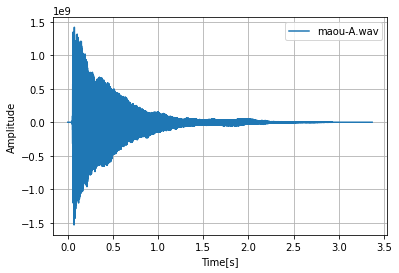

In [70]:
maou.displayFigUneditWav()

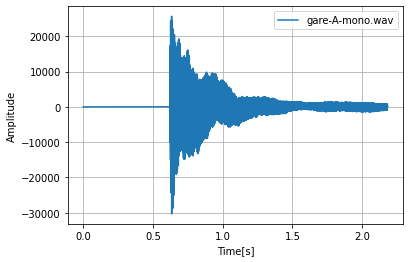

In [71]:
gare.displayFigUneditWav()

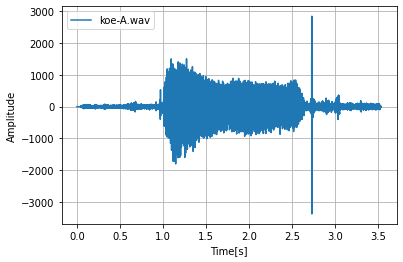

In [72]:
koe.displayFigUneditWav()

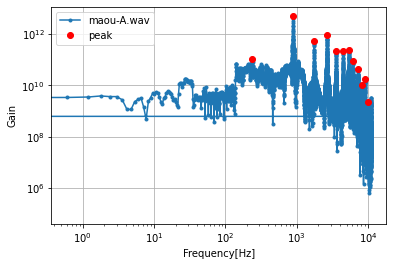

'A5'

In [73]:
maouInterval, maouFreq = maou.displayFigFFTWav(1000)
maouInterval

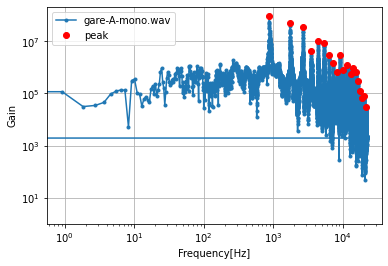

'A5'

In [74]:
gareInterval, gareFreq = gare.displayFigFFTWav(900)
gareInterval

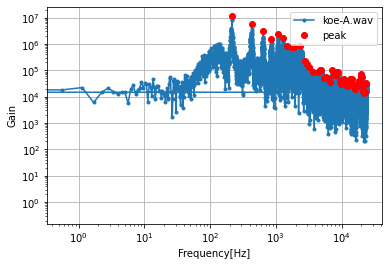

'A3'

In [75]:
koeInterval,koeFreq = koe.displayFigFFTWav(300)
koeInterval

In [77]:
maouFreq[1:5]

array([ 879.55481388, 1759.70311953, 2644.59935941, 3533.65004172])

In [78]:
gareFreq[0:4]

array([ 879.98337144, 1763.63334026, 2650.03325712, 3542.84971939])

In [67]:
koeFreq[0:5]

array([ 214.04115633,  428.08231266,  642.12346899,  855.59987293,
       1069.64102926])

In [81]:
for i in range(4):
    print(maouFreq[i+1] - gareFreq[i])

-0.4285575627001208
-3.9302207291566447
-5.433897713401166
-9.199677673680526
